# CRIME DETECTION SYSTEM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import folium
from folium.plugins import HeatMap

### Load Data

In [2]:
crime_data = pd.read_csv('Crime_Data_from_2010_to_2019.csv')
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [3]:
crime_data.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
2123039,190506304,02/22/2019 12:00:00 AM,02/22/2019 12:00:00 AM,840,5,Harbor,569,2,627,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,...,AO,Adult Other,627.0,NaN,NaN,NaN,100 W 22ND ST,NaN,33.7257,-118.2801
2123040,190608903,03/28/2019 12:00:00 AM,03/28/2019 12:00:00 AM,400,6,Hollywood,644,1,648,ARSON,...,IC,Invest Cont,648.0,NaN,NaN,NaN,1400 N LA BREA AV,NaN,34.0962,-118.3490
2123041,192004409,01/06/2019 12:00:00 AM,01/06/2019 12:00:00 AM,2100,20,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,IC,Invest Cont,930.0,NaN,NaN,NaN,6TH,VIRGIL,34.0637,-118.2870
2123042,191716777,10/17/2019 12:00:00 AM,10/16/2019 12:00:00 AM,1800,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,17200 NAPA ST,NaN,34.2266,-118.5085
2123043,190805435,02/01/2019 12:00:00 AM,02/01/2019 12:00:00 AM,1615,8,West LA,852,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,NaN,NaN,NaN,1700 BARRY AV,NaN,34.0420,-118.4531


In [4]:
print(crime_data.columns)

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')


In [5]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123044 entries, 0 to 2123043
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   Date Rptd       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            int64  
 5   AREA NAME       object 
 6   Rpt Dist No     int64  
 7   Part 1-2        int64  
 8   Crm Cd          int64  
 9   Crm Cd Desc     object 
 10  Mocodes         object 
 11  Vict Age        int64  
 12  Vict Sex        object 
 13  Vict Descent    object 
 14  Premis Cd       float64
 15  Premis Desc     object 
 16  Weapon Used Cd  float64
 17  Weapon Desc     object 
 18  Status          object 
 19  Status Desc     object 
 20  Crm Cd 1        float64
 21  Crm Cd 2        float64
 22  Crm Cd 3        float64
 23  Crm Cd 4        float64
 24  LOCATION        object 
 25  Cross Street    object 
 26  LAT             float64
 27  LON             float64
dtypes: float64(8

The columns of the dataset are:
1. DR_NO: Report number for the incident (int64)
2. Date Rptd: Date the incident was reported (object, might need to be converted to a datetime format)
3. DATE OCC: Date of occurrence of the incident (object, might need to be converted to a datetime format)
4. TIME OCC: Time of occurrence of the incident (int64)
5. AREA: Area code related to the incident (int64)
6. AREA NAME: Name of the area related to the incident (object)
7. Rpt Dist No: Report district number (int64)
8. Part 1-2: Classification of the incident (int64)
9. Crm Cd: Crime code (int64)
10. Crm Cd Desc: Description of the crime code (object)
11. Mocodes: Modus operandi codes (object)
12. Vict Age: Age of the victim (int64)
13. Vict Sex: Sex of the victim (object)
14. Vict Descent: Descent of the victim (object)
15. Premis Cd: Premises code (float64)
16. Premis Desc: Description of the premises (object)
17. Weapon Used Cd: Weapon code used (float64)
18. Weapon Desc: Description of the weapon used (object)
19. Status: Status of the incident (object)
20. Status Desc: Description of the status (object)
21. Crm Cd 1-4: Additional crime codes (float64)
22. LOCATION: Location of the incident (object)
23. Cross Street: Cross street of the incident (object)
24. LAT: Latitude coordinates (float64)
25. LON: Longitude coordinates (float64)

In [6]:
crime_data.shape

(2123044, 28)

In [7]:
crime_data.isnull().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            228449
Vict Age                0
Vict Sex           196818
Vict Descent       196864
Premis Cd              53
Premis Desc           187
Weapon Used Cd    1409313
Weapon Desc       1409314
Status                  3
Status Desc             0
Crm Cd 1               10
Crm Cd 2          1981680
Crm Cd 3          2119481
Crm Cd 4          2122939
LOCATION                0
Cross Street      1767300
LAT                     0
LON                     0
dtype: int64

### Preprocessing & Visualisation

#### Date and Time

In [8]:
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [9]:
# Stripping leading/trailing whitespaces from selected columns
columns_to_strip = [
    'DR_NO',  'DATE OCC', 'TIME OCC',  'AREA NAME', 'Crm Cd Desc', 'Mocodes',
    'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc', 'Status', 'Status Desc', 'LOCATION',
    'Cross Street'
]

# Ensure all columns to strip are converted to string type to avoid issues with NaN/None values
for column in columns_to_strip:
    crime_data[column] = crime_data[column].astype(str).str.strip()

# Splitting 'Date Rptd' and 'DATE OCC' columns into date and time components
crime_data['date_time_rptd'] = crime_data['Date Rptd'].str.split()
crime_data['date_rptd'] = crime_data['date_time_rptd'].apply(lambda x: x[0] if isinstance(x, list) else None)
crime_data['time_rptd'] = crime_data['date_time_rptd'].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else None)

crime_data['date_time_occ'] = crime_data['DATE OCC'].str.split()
crime_data['date_occ'] = crime_data['date_time_occ'].apply(lambda x: x[0] if isinstance(x, list) else None)
crime_data['time_occ'] = crime_data['date_time_occ'].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else None)

crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,LOCATION,Cross Street,LAT,LON,date_time_rptd,date_rptd,time_rptd,date_time_occ,date_occ,time_occ
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,300 E GAGE AV,nan,33.9825,-118.2695,"[02/20/2010, 12:00:00, AM]",02/20/2010,12:00:00,"[02/20/2010, 12:00:00, AM]",02/20/2010,12:00:00
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,"[09/13/2010, 12:00:00, AM]",09/13/2010,12:00:00,"[09/12/2010, 12:00:00, AM]",09/12/2010,12:00:00
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,1300 E 21ST ST,nan,34.0224,-118.2524,"[08/09/2010, 12:00:00, AM]",08/09/2010,12:00:00,"[08/09/2010, 12:00:00, AM]",08/09/2010,12:00:00
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,"[01/05/2010, 12:00:00, AM]",01/05/2010,12:00:00,"[01/05/2010, 12:00:00, AM]",01/05/2010,12:00:00
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,8TH ST,SAN PEDRO ST,34.0387,-118.2488,"[01/03/2010, 12:00:00, AM]",01/03/2010,12:00:00,"[01/02/2010, 12:00:00, AM]",01/02/2010,12:00:00


In [10]:
# Extracting year from 'Date Occurred' and creating a new 'Date' column
crime_data['date'] = pd.to_datetime(crime_data['date_occ']).dt.year

crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Cross Street,LAT,LON,date_time_rptd,date_rptd,time_rptd,date_time_occ,date_occ,time_occ,date
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,nan,33.9825,-118.2695,"[02/20/2010, 12:00:00, AM]",02/20/2010,12:00:00,"[02/20/2010, 12:00:00, AM]",02/20/2010,12:00:00,2010
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,MANCHESTER AV,33.9599,-118.3962,"[09/13/2010, 12:00:00, AM]",09/13/2010,12:00:00,"[09/12/2010, 12:00:00, AM]",09/12/2010,12:00:00,2010
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,nan,34.0224,-118.2524,"[08/09/2010, 12:00:00, AM]",08/09/2010,12:00:00,"[08/09/2010, 12:00:00, AM]",08/09/2010,12:00:00,2010
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,HOLLYWOOD BL,34.1016,-118.3295,"[01/05/2010, 12:00:00, AM]",01/05/2010,12:00:00,"[01/05/2010, 12:00:00, AM]",01/05/2010,12:00:00,2010
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,SAN PEDRO ST,34.0387,-118.2488,"[01/03/2010, 12:00:00, AM]",01/03/2010,12:00:00,"[01/02/2010, 12:00:00, AM]",01/02/2010,12:00:00,2010


In [11]:
# Dropping the columns
columns_to_drop = ['date_time_rptd', 'date_time_occ', 'Date Rptd', 'DATE OCC']
crime_data.drop(columns=columns_to_drop, inplace=True, axis=1)

# Changing the column names
crime_data.rename({'DR_NO': 'dr_no', 'TIME OCC': 'time_occ_code'}, axis=1, inplace=True)

crime_data.head()

,dr_no,time_occ_code,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,...,Crm Cd 4,LOCATION,Cross Street,LAT,LON,date_rptd,time_rptd,date_occ,time_occ,date
0,1307355,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,...,NaN,300 E GAGE AV,nan,33.9825,-118.2695,02/20/2010,12:00:00,02/20/2010,12:00:00,2010
1,11401303,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,...,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,09/13/2010,12:00:00,09/12/2010,12:00:00,2010
2,70309629,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,0,...,NaN,1300 E 21ST ST,nan,34.0224,-118.2524,08/09/2010,12:00:00,08/09/2010,12:00:00,2010
3,90631215,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,...,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,01/05/2010,12:00:00,01/05/2010,12:00:00,2010
4,100100501,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,...,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,01/03/2010,12:00:00,01/02/2010,12:00:00,2010


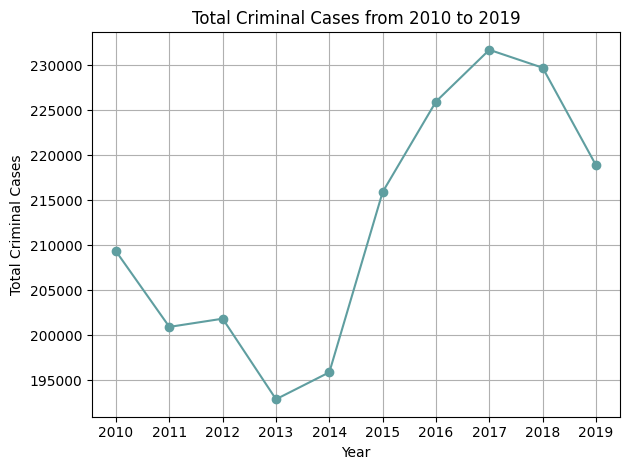

In [12]:
# Filter the data for the years 2010 to 2019
crime_data_2010_2019 = crime_data[(crime_data['date'] >= 2010) & (crime_data['date'] <= 2019)]

# Group by year and count the total criminal cases for each year
crime_by_year = crime_data_2010_2019.groupby('date').size()

plt.plot(crime_by_year.index, crime_by_year.values, marker='o', linestyle='-', color = 'cadetblue')
plt.title('Total Criminal Cases from 2010 to 2019')
plt.xlabel('Year')
plt.ylabel('Total Criminal Cases')
plt.grid(True)
plt.xticks(crime_by_year.index)
plt.tight_layout()
plt.show()

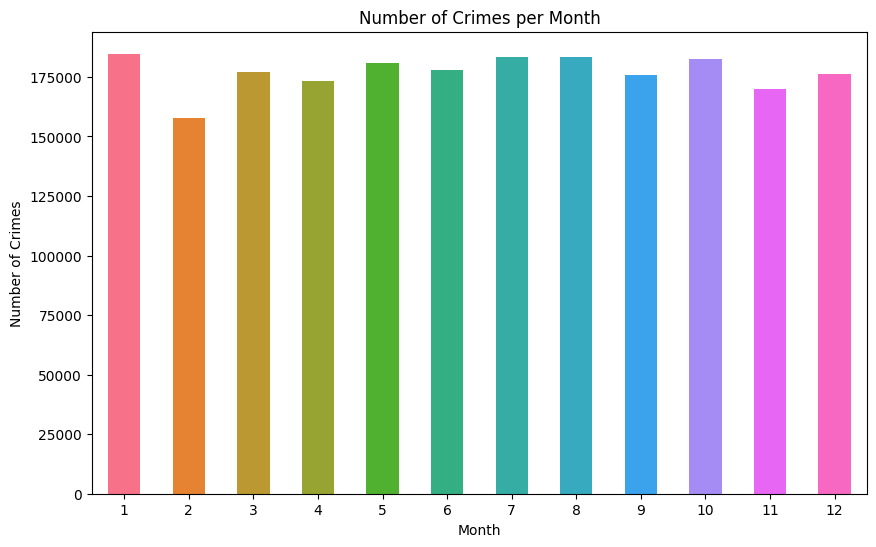

In [13]:
crime_data['date_occ'] = pd.to_datetime(crime_data['date_occ'])
crime_data['month_occ'] = crime_data['date_occ'].dt.month
crimes_per_month = crime_data['month_occ'].value_counts().sort_index()

num_months = len(crimes_per_month)
palette = sns.color_palette("husl", num_months)
plt.figure(figsize=(10, 6))
crimes_per_month.plot(kind='bar', color=palette)
plt.title('Number of Crimes per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)  # Keep x-axis labels vertical
plt.show()

#### Area

In [14]:
# Changing the column names
crime_data.rename({'AREA': 'area', 'AREA NAME': 'area_name', 'LOCATION':'location_name', 'Cross Street':'cross_street', 
                   'LAT': 'lat_coor', 'LON':'lon_coor', 'Rpt Dist No':'rpt_dist_no', 'Part 1-2':'part'}, axis=1, inplace=True)
crime_data.head()

,dr_no,time_occ_code,AREA,area_name,rpt_dist_no,part,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,...,location_name,cross_street,lat_coor,lon_coor,date_rptd,time_rptd,date_occ,time_occ,date,month_occ
0,1307355,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,...,300 E GAGE AV,nan,33.9825,-118.2695,02/20/2010,12:00:00,2010-02-20,12:00:00,2010,2
1,11401303,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,...,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,09/13/2010,12:00:00,2010-09-12,12:00:00,2010,9
2,70309629,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,0,...,1300 E 21ST ST,nan,34.0224,-118.2524,08/09/2010,12:00:00,2010-08-09,12:00:00,2010,8
3,90631215,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,...,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,01/05/2010,12:00:00,2010-01-05,12:00:00,2010,1
4,100100501,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,...,8TH ST,SAN PEDRO ST,34.0387,-118.2488,01/03/2010,12:00:00,2010-01-02,12:00:00,2010,1


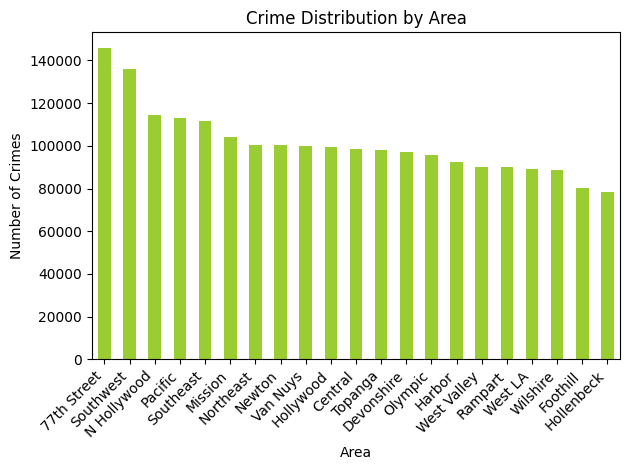

In [15]:
# Grouping data by 'AREA NAME' and counting occurrences
crime_by_area = crime_data['area_name'].value_counts()

crime_by_area.plot(kind='bar', color='yellowgreen')
plt.title('Crime Distribution by Area')
plt.xlabel('Area')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

#### Crime

In [16]:
columns_to_drop = ['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Mocodes'] 
crime_data.drop(columns=columns_to_drop, inplace=True)

In [17]:
crime_data.rename({'Crm Cd': 'crm_code', 'Crm Cd Desc': 'crm_desc', 
                 'Premis Cd':'premis_code' ,'Premis Desc':'premis_desc', 'Weapon Used Cd':'weapon_code',
                  'Weapon Desc':'weapon_desc', 'Status':'status', 'Status Desc':'status_desc' }, axis=1, inplace=True)

crime_data['weapon_desc'] = crime_data['weapon_desc'].replace('nan', np.nan)
crime_data.head()

,dr_no,time_occ_code,AREA,area_name,rpt_dist_no,part,crm_code,crm_desc,Vict Age,Vict Sex,...,location_name,cross_street,lat_coor,lon_coor,date_rptd,time_rptd,date_occ,time_occ,date,month_occ
0,1307355,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,48,M,...,300 E GAGE AV,nan,33.9825,-118.2695,02/20/2010,12:00:00,2010-02-20,12:00:00,2010,2
1,11401303,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,...,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,09/13/2010,12:00:00,2010-09-12,12:00:00,2010,9
2,70309629,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0,M,...,1300 E 21ST ST,nan,34.0224,-118.2524,08/09/2010,12:00:00,2010-08-09,12:00:00,2010,8
3,90631215,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,47,F,...,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,01/05/2010,12:00:00,2010-01-05,12:00:00,2010,1
4,100100501,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",47,F,...,8TH ST,SAN PEDRO ST,34.0387,-118.2488,01/03/2010,12:00:00,2010-01-02,12:00:00,2010,1


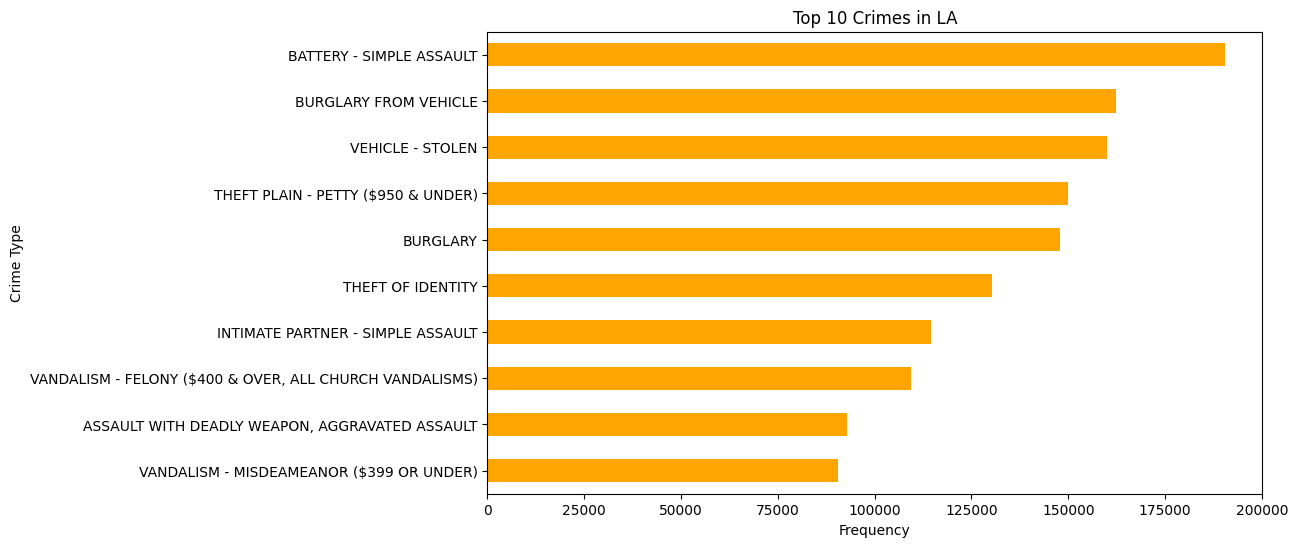

In [18]:
top_crime_types = crime_data['crm_desc'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_crime_types.plot(kind='barh', color='orange')
plt.title('Top 10 Crimes in LA')
plt.xlabel('Frequency')
plt.ylabel('Crime Type')
plt.gca().invert_yaxis()
plt.show()

In [19]:
crime_data['weapon_desc'].value_counts()

weapon_desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    433685
VERBAL THREAT                                      58728
UNKNOWN WEAPON/OTHER WEAPON                        57545
HAND GUN                                           34125
SEMI-AUTOMATIC PISTOL                              12913
                                                   ...  
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                   11
ANTIQUE FIREARM                                        9
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    7
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       3
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       1
Name: count, Length: 79, dtype: int64

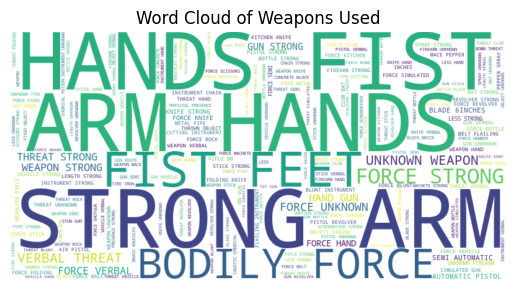

In [20]:
weapons_text = ' '.join(crime_data['weapon_desc'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(weapons_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Weapons Used')
plt.show()

#### Victim

In [21]:
crime_data.rename({'Vict Age': 'vict_age', 'Vict Sex': 'vict_sex', 'Vict Descent':'vict_des' }, axis=1, inplace=True)
crime_data.head()

,dr_no,time_occ_code,AREA,area_name,rpt_dist_no,part,crm_code,crm_desc,vict_age,vict_sex,...,location_name,cross_street,lat_coor,lon_coor,date_rptd,time_rptd,date_occ,time_occ,date,month_occ
0,1307355,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,48,M,...,300 E GAGE AV,nan,33.9825,-118.2695,02/20/2010,12:00:00,2010-02-20,12:00:00,2010,2
1,11401303,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,...,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,09/13/2010,12:00:00,2010-09-12,12:00:00,2010,9
2,70309629,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0,M,...,1300 E 21ST ST,nan,34.0224,-118.2524,08/09/2010,12:00:00,2010-08-09,12:00:00,2010,8
3,90631215,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,47,F,...,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,01/05/2010,12:00:00,2010-01-05,12:00:00,2010,1
4,100100501,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",47,F,...,8TH ST,SAN PEDRO ST,34.0387,-118.2488,01/03/2010,12:00:00,2010-01-02,12:00:00,2010,1


In [22]:
# Calculate the mean of non-zero positive ages
mean_age = np.mean(crime_data.loc[(crime_data['vict_age'] > 0), 'vict_age'])
crime_data.loc[(crime_data['vict_age'] <= 0), 'vict_age'] = mean_age
crime_data['vict_age'] = crime_data['vict_age'].astype(int)

crime_data.head()

C:\Users\ananb\AppData\Local\Temp\ipykernel_8144\3456460027.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '38.464868168953316' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  crime_data.loc[(crime_data['vict_age'] <= 0), 'vict_age'] = mean_age


,dr_no,time_occ_code,AREA,area_name,rpt_dist_no,part,crm_code,crm_desc,vict_age,vict_sex,...,location_name,cross_street,lat_coor,lon_coor,date_rptd,time_rptd,date_occ,time_occ,date,month_occ
0,1307355,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,48,M,...,300 E GAGE AV,nan,33.9825,-118.2695,02/20/2010,12:00:00,2010-02-20,12:00:00,2010,2
1,11401303,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",38,M,...,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,09/13/2010,12:00:00,2010-09-12,12:00:00,2010,9
2,70309629,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,38,M,...,1300 E 21ST ST,nan,34.0224,-118.2524,08/09/2010,12:00:00,2010-08-09,12:00:00,2010,8
3,90631215,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,47,F,...,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,01/05/2010,12:00:00,2010-01-05,12:00:00,2010,1
4,100100501,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",47,F,...,8TH ST,SAN PEDRO ST,34.0387,-118.2488,01/03/2010,12:00:00,2010-01-02,12:00:00,2010,1


In [23]:
crime_data['vict_sex'].unique()

array(['M', 'F', 'nan', 'X', 'H', '-', 'N'], dtype=object)

In [24]:
crime_data['vict_sex'] = crime_data['vict_sex'].replace('nan', np.nan)

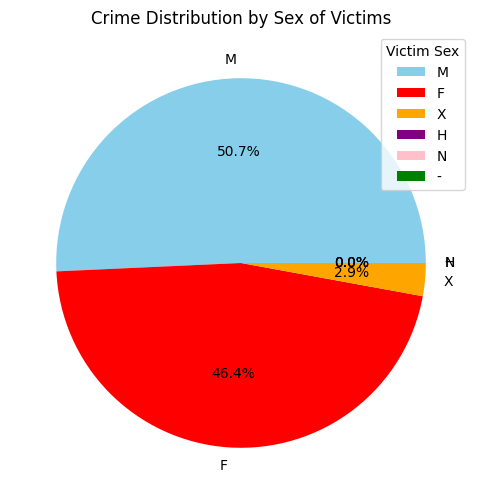

In [25]:
plt.figure(figsize=(8, 6))
crime_data['vict_sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'red', 'orange','purple', 'pink','green'])
plt.title('Crime Distribution by Sex of Victims')
plt.ylabel('')
plt.legend(title='Victim Sex', loc='upper right')
plt.show()

In [26]:
crime_data['vict_sex'] = crime_data["vict_sex"].replace(['H', 'N','-'], 'X')
crime_data['vict_sex'].value_counts()

vict_sex
M    977042
F    893785
X     55399
Name: count, dtype: int64

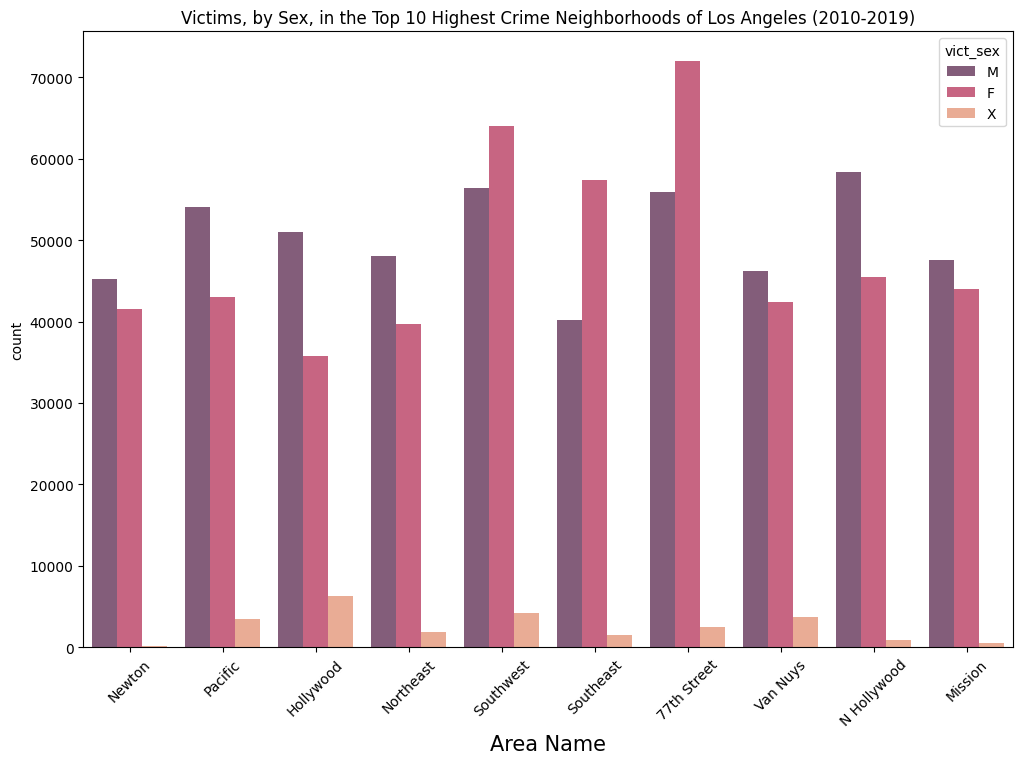

In [27]:
top_10_areas = crime_data['area_name'].value_counts().head(10).index.tolist()
df_top_10_areas = crime_data[crime_data['area_name'].isin(top_10_areas)]

fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x='area_name', hue='vict_sex', data=df_top_10_areas, palette='rocket', alpha=0.75)
ax.set_title('Victims, by Sex, in the Top 10 Highest Crime Neighborhoods of Los Angeles (2010-2019)')
ax.set_xlabel('Area Name', fontsize=15)
plt.xticks(rotation=45) 
plt.show()

In [28]:
crime_data['vict_des'].unique()

array(['H', 'W', 'B', 'A', 'O', 'X', 'K', 'nan', 'I', 'J', 'F', 'C', 'P',
       'V', 'U', 'G', 'D', 'S', 'Z', 'L', '-'], dtype=object)

In [29]:
crime_data['vict_des'] = crime_data['vict_des'].replace('nan', np.nan)
crime_data['vict_des'] = crime_data['vict_des'].replace('-', np.nan)

In [30]:
victims = {
      "A": "Asian",
      "B": "Black",
      "C": "Chinese",
      "D": "Cambodian",
      "F": "Filipino",
      "G": "Guamanian",
      "H": "Hispanic/Latin/Mexican",
      "I": "American Indian/Alaskan Native",
      "J": "Japanese",
      "K": "Korean",
      "L": "Laotian",
      "O": "Other",
      "P": "Pacific Islander",
      "S": "Samoan",
      "U": "Hawaiian",
      "V": "Vietnamese",
      "W": "White",
      "X": "Unknown",
      "Z": "Asian Indian"
  }

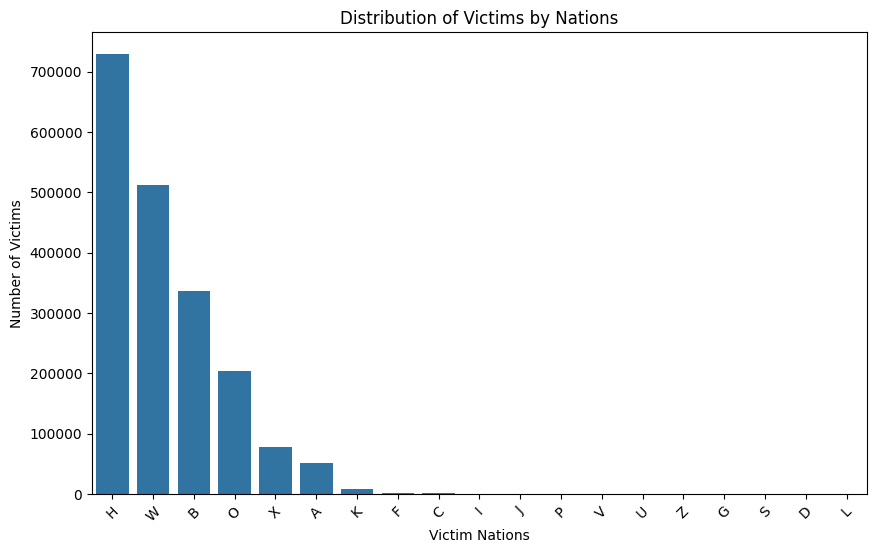

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='vict_des', data=crime_data, order=crime_data['vict_des'].value_counts().index)
plt.title('Distribution of Victims by Nations')
plt.xlabel('Victim Nations')
plt.ylabel('Number of Victims')
plt.xticks(rotation=45)  
plt.show()

In [32]:
crime_data = crime_data.dropna(subset=['vict_sex', 'vict_des'])

In [33]:
crime_data.shape

(1926174, 27)

In [34]:
aggregated_data = crime_data.groupby(['lat_coor', 'lon_coor']).size().reset_index(name='crime_count')
la_latitude = 34.052235
la_longitude = -118.243683
la_map = folium.Map(location=[la_latitude, la_longitude], zoom_start=10)

# Create a HeatMap layer using the aggregated crime data
heat_data = aggregated_data[['lat_coor', 'lon_coor', 'crime_count']].values.tolist()
HeatMap(heat_data, radius=15).add_to(la_map)

# Display the map
la_map

### Crime Prediction